 





#  Examples are from the book AISL. 	An Introduction to Statistical Learning

#  1. The Validation Set Approach

In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt

In this section, we'll explore the use of the validation set approach in order to estimate the
test error rates that result from fitting various linear models on the ${\tt Auto}$ data set.

In [2]:
df1 = pd.read_csv('Auto.csv', na_values='?').dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [3]:
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


We begin by using the ${\tt sample()}$ function to split the set of observations
into two halves, by selecting a random subset of 196 observations out of
the original 392 observations. We refer to these observations as the training
set.

We'll use the ${\tt random\_state}$ parameter in order to set a seed for
${\tt python}$’s random number generator, so that you'll obtain precisely the same results each time. It is generally a good idea to set a random seed when performing an analysis such as cross-validation
that contains an element of randomness, so that the results obtained can be reproduced precisely at a later time.

In [4]:
train_df = df1.sample(196, random_state = 1)
test_df = df1[~df1.isin(train_df)].dropna(how = 'all')

X_train = train_df['horsepower'].values.reshape(-1,1)
y_train = train_df['mpg']
X_test = test_df['horsepower'].values.reshape(-1,1)
y_test = test_df['mpg']

We then use ${\tt LinearRegression()}$ to fit a linear regression to predict ${\tt mpg}$ from ${\tt horsepower}$ using only
the observations corresponding to the training set.

In [5]:
lm = skl_lm.LinearRegression()
model = lm.fit(X_train, y_train)

We now use the ${\tt predict()}$ function to estimate the response for the test
observations, and we use ${\tt sklearn}$ to caclulate the MSE.

In [6]:
pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, pred)
    
print(MSE)

23.361902892587224


Therefore, the estimated test MSE for the linear regression fit is 23.36.  

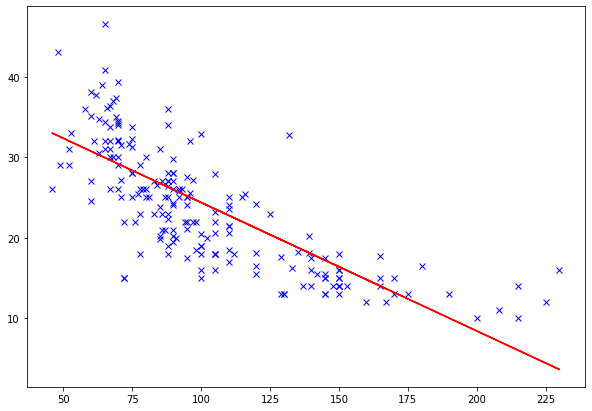

In [7]:
#plt.scatter(X, Y, color='Blue')
fig, ax = plt.subplots()

ax.plot(X_test,y_test,'x',color='Blue')
plt.plot(X_test, pred, color='red')
fig.set_size_inches(10, 7) 
plt.show()

We can use the ${\tt PolynomialFeatures()}$ function to estimate the test error for the polynomial
and cubic regressions.

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

model2 = lm.fit(X_train2, y_train)
print(mean_squared_error(y_test, model2.predict(X_test2)))

20.252690858345748


Plot the quadratic fitting graph: 

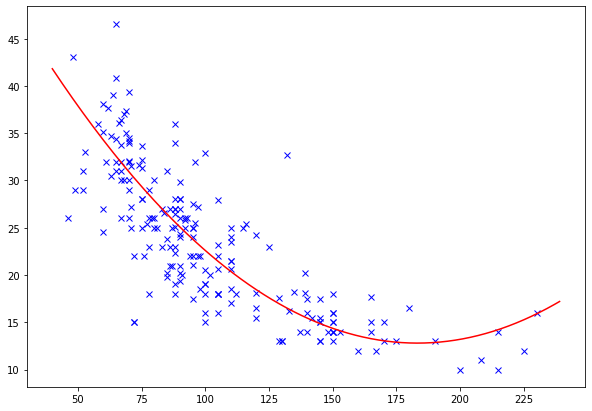

In [9]:
xplot =  np.arange(40,240).reshape(-1,1) 
X_plot2 = poly.fit_transform(xplot) 
pred = model2.predict(X_plot2)

#plt.scatter(X, Y, color='Blue')
fig, ax = plt.subplots()

plt.plot(X_test,y_test,'x',color='Blue')
plt.plot(xplot, pred, color='red')
fig.set_size_inches(10, 7) 
plt.show()

In [10]:
# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

model3 = lm.fit(X_train3, y_train)
print(mean_squared_error(y_test, model3.predict(X_test3)))

20.325609365972525


These error rates are 20.25 and 20.33, respectively. If we choose a different
training set instead, then we will obtain somewhat different errors on the
validation set. We can test this out by setting a different random seed:

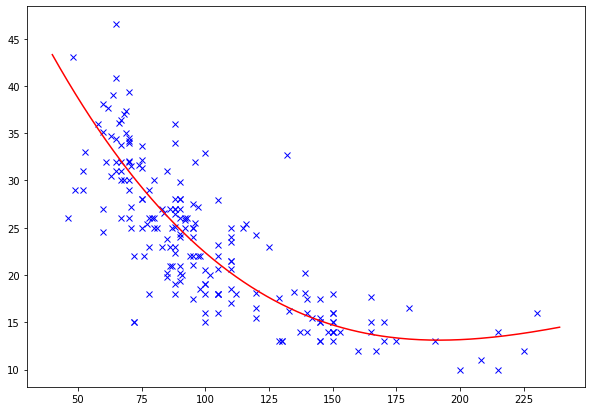

In [11]:
xplot =  np.arange(40,240).reshape(-1,1) 
X_plot3 = poly.fit_transform(xplot) 
pred = model3.predict(X_plot3)

#plt.scatter(X, Y, color='Blue')
fig, ax = plt.subplots()

plt.plot(X_test,y_test,'x',color='Blue')
plt.plot(xplot, pred, color='red')
fig.set_size_inches(10, 7) 
plt.show()

If we choose a different training set instead, then we will obtain somewhat different errors on the validation set. We can test this out by setting a different random seed:

In [12]:
train_df = df1.sample(196, random_state = 2)
test_df = df1[~df1.isin(train_df)].dropna(how = 'all')

X_train = train_df['horsepower'].values.reshape(-1,1)
y_train = train_df['mpg']
X_test = test_df['horsepower'].values.reshape(-1,1)
y_test = test_df['mpg']

# Linear
model = lm.fit(X_train, y_train)
print(mean_squared_error(y_test, model.predict(X_test)))

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

model = lm.fit(X_train2, y_train)
print(mean_squared_error(y_test, model.predict(X_test2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

model = lm.fit(X_train3, y_train)
print(mean_squared_error(y_test, model.predict(X_test3)))

25.10853905288967
19.722533470492426
19.92136786007267


Using this split of the observations into a training set and a validation
set, we find that the validation set error rates for the models with linear,
quadratic, and cubic terms are 25.11, 19.72, and 19.92, respectively.

These results are consistent with our previous findings: a model that
predicts ${\tt mpg}$ using a quadratic function of ${\tt horsepower}$ performs better than
a model that involves only a linear function of ${\tt horsepower}$, and there is
little evidence in favor of a model that uses a cubic function of ${\tt horsepower}$.

# 2 Leave-One-Out Cross-Validation

The LOOCV estimate can be automatically computed for any generalized linear model using the `LeaveOneOut()` and `KFold()` functions.

In [13]:
model = lm.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
X = df1['horsepower'].values.reshape(-1,1)
y = df1['mpg'].values.reshape(-1,1)
loo.get_n_splits(X)

392

In [14]:
from sklearn.model_selection import KFold

crossvalidation = KFold(n_splits=392, random_state=None, shuffle=False)

scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))


Folds: 392, MSE: 24.231513517929226, STD: 36.79731503640535


Our cross-validation estimate for the test error is approximately 24.23. We can repeat this procedure for increasingly complex polynomial fits.
To automate the process, we use the `for()` function to initiate a for loop
which iteratively fits polynomial regressions for polynomials of order `i = 1`
to `i = 5` and computes the associated cross-validation error. 

This command may take a couple of minutes to run.

In [15]:
for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))


Degree-1 polynomial MSE: 24.231513517929226, STD: 36.797315036405344
Degree-2 polynomial MSE: 19.248213124489745, STD: 34.998446151782346
Degree-3 polynomial MSE: 19.33498406411498, STD: 35.76513567797254
Degree-4 polynomial MSE: 19.424430307079398, STD: 35.68335275228356
Degree-5 polynomial MSE: 19.033198669299846, STD: 35.31730233206771


Here we see a sharp drop in the estimated test MSE between
the linear and quadratic fits, but then no clear improvement from using
higher-order polynomials.

# 3 k-Fold Cross-Validation

The `KFold` function can (intuitively) also be used to implement `k`-fold CV. Below we
use `k = 10`, a common choice for `k`, on the `Auto` data set. We once again set
a random seed and initialize a vector in which we will print the CV errors
corresponding to the polynomial fits of orders one to ten.

In [16]:
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=True)

for i in range(1,11):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 24.097675731883065, STD: 4.818054666704996
Degree-2 polynomial MSE: 19.178889864889662, STD: 5.126393446517315
Degree-3 polynomial MSE: 19.213859523725397, STD: 5.143687485472378
Degree-4 polynomial MSE: 19.212807019336758, STD: 4.9266610275904545
Degree-5 polynomial MSE: 18.757986351357186, STD: 4.703229177550526
Degree-6 polynomial MSE: 18.639821824189532, STD: 4.508891213835661
Degree-7 polynomial MSE: 18.82048365435179, STD: 4.565637144202346
Degree-8 polynomial MSE: 18.97573694949977, STD: 4.711723415831585
Degree-9 polynomial MSE: 18.93759692979913, STD: 4.86948435554946
Degree-10 polynomial MSE: 18.790873192547927, STD: 4.841422783133866


Notice that the computation time is **much** shorter than that of LOOCV.
(In principle, the computation time for LOOCV for a least squares linear
model should be faster than for `k`-fold CV, due to the availability of the
formula (5.2) for LOOCV in the book; however, unfortunately the `KFold()` function
does not make use of this formula.) We still see little evidence that using
cubic or higher-order polynomial terms leads to lower test error than simply
using a quadratic fit.



#  4 The Bootstrap

We illustrate the use of the bootstrap in the simple example of Section 5.2,
as well as on an example involving estimating the accuracy of the linear
regression model on the `Auto`data set.

# 4.1 Estimating the Accuracy of a Statistic of Interest

One of the great advantages of the bootstrap approach is that it can be
applied in almost all situations. No complicated mathematical calculations
are required. Performing a bootstrap analysis in entails only two steps.

- First, we must create a function that computes the statistic of interest.
- Second, we use the `boot()` function, which is part of the boot library, to perform the bootstrap by repeatedly sampling observations from the data set with replacement.

The `Portfolio` data set in the `ISLR` package is described in Section 5.2. It has variables called `X` and `Y`. 

In [17]:
portfolio_df = pd.read_csv('Portfolio.csv')
portfolio_df

,X,Y
0,-0.895251,-0.234924
1,-1.562454,-0.885176
2,-0.417090,0.271888
3,1.044356,-0.734198
4,-0.315568,0.841983
...,...,...
95,0.479091,1.454774
96,-0.535020,-0.399175
97,-0.773129,-0.957175
98,0.403634,1.396038


To illustrate the use of the bootstrap on this data, we must first create
a function, `alpha()`, which takes as input the data and outputs the estimate for $\alpha$ (described in more detail on lecture notes(page39 formula for p) on Bootstrap or page 187 of the book).

In [18]:
def alpha(X,Y):
    return ((np.var(Y)-np.cov(X,Y))/(np.var(X)+np.var(Y)-2*np.cov(X,Y)))

This function returns, or outputs, an estimate for $\alpha$ based on applying
(5.7) to the observations indexed by the argument index. For instance, the
following command tells `python` to estimate $\alpha$ using all 100 observations.

In [19]:
X = portfolio_df.X[0:100]
y = portfolio_df.Y[0:100]
print(alpha(X,y))

[[1.07270947 0.57665115]
 [0.57665115 0.06414064]]


The next command uses the `sample()` function to randomly select 100 observations
from the range 1 to 100, with replacement. This is equivalent
to constructing a new bootstrap data set and recomputing $\hat{\alpha}$ based on the
new data set.

In [20]:
dfsample = portfolio_df.sample(frac=1, replace=True)
X = dfsample.X[0:100]
y = dfsample.Y[0:100]
print(alpha(X,y))

[[ 0.90027103  0.46043229]
 [ 0.46043229 -0.1484677 ]]


We can implement a bootstrap analysis by performing this command many
times, recording all of the corresponding estimates for $\alpha$, and computing the resulting standard deviation. However, the `boot()`function automates
this approach. Below we produce $1,000$ bootstrap estimates for $\alpha$:

In [21]:
def bstrap(df):
    tresult = 0
    for i in range(0,1000):
        dfsample = df.sample(frac=1, replace=True)
        X = dfsample.X[0:100]
        y = dfsample.Y[0:100]
        result = alpha(X,y)
        tresult += result
    fresult = tresult / 1000
    print(fresult)
bstrap(portfolio_df)

[[1.14970568 0.57749661]
 [0.57749661 0.05327832]]


The final output shows that using the original data, 𝛼̂ =0.58  (Here we take the avarage of all alphas) Next, we collect all alphas.

In [22]:
alphas = [ ]
for i in range(0,1000):
    dfsample = portfolio_df.sample(frac=1, replace=True)
    X = dfsample.X[0:100]
    y = dfsample.Y[0:100]
    result = alpha(X,y)[0,1]
    alphas = np.append(alphas,result)

In [23]:
np.std(alphas)

0.08851682958786132

In [24]:
np.mean(alphas)

0.578529391305337

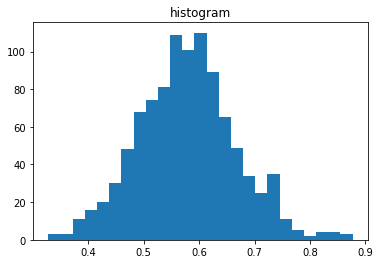

In [25]:
%matplotlib inline
from matplotlib import pyplot as plt  
plt.hist(alphas, bins = 'auto') 
plt.title("histogram") 
plt.show()

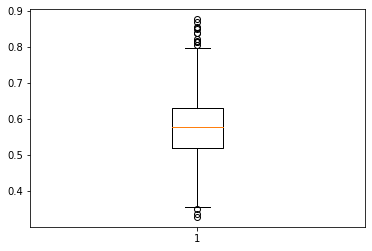

In [26]:
plt.boxplot(alphas) 
# show plot  
plt.show() 

In [27]:
from scipy import stats 
stats.describe(alphas)

DescribeResult(nobs=1000, minmax=(0.32811279093166257, 0.87694731340944), mean=0.578529391305337, variance=0.007843072192478961, skewness=0.18095107627464774, kurtosis=0.20645251478910387)

In [43]:
np.percentile(alphas, [10,50,90])  # compute percentiles  p=10%, p=50%, p=90%

array([0.4707255 , 0.57839199, 0.69367286])



#  4.2 Estimating the Accuracy of a Linear Regression Model

The bootstrap approach can be used to assess the variability of the coefficient
estimates and predictions from a statistical learning method. Here
we use the bootstrap approach in order to assess the variability of the
estimates for $\beta_0$ and $\beta_1$, the intercept and slope terms for the linear regression
model that uses horsepower to predict mpg in the Auto data set. We
will compare the estimates obtained using the bootstrap to those obtained
using the formulas for $SE(\hat{\beta}_0)$ and $SE(\hat{\beta}_1)$ described in Section 3.1.2.

First let's refresh our memory about a linear model of the `Auto` dataset:

In [29]:
from sklearn.utils import resample

#auto_df = pd.read_csv('Auto.csv')
auto_df = pd.read_csv('Auto.csv', na_values='?').dropna()

auto_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [30]:
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [31]:
lm = skl_lm.LinearRegression()
X = auto_df['horsepower'].values.reshape(-1,1)
y = auto_df['mpg']

In [32]:
clf = lm.fit(X,y)
print(clf.coef_, clf.intercept_)

[-0.15784473] 39.93586102117047


Next, we use the `bootstrap()`function to compute the standard errors of n=392 (same size as data)
bootstrap estimates for the intercept and slope terms:

In [33]:
from sklearn.metrics import mean_squared_error

Xsamp, ysamp = resample(X, y, n_samples=392)
clf = lm.fit(Xsamp,ysamp)
print('Intercept: ' + str(clf.intercept_) + " Coef: " + str(clf.coef_))

Intercept: 40.738383448297256 Coef: [-0.16690116]


In [34]:
clf.intercept_

40.738383448297256

In [35]:
clf.coef_[0]

-0.16690116130281318

# 4.3 Estimating confidence interval of parameters

In [36]:
Coefs = []
Intercepts=[] 

for i in range(0,1000): 
    Xsamp, ysamp = resample(X, y, n_samples=392)
    clf = lm.fit(Xsamp,ysamp)
    Coefs = np.append(Coefs, clf.coef_[0])
    Intercepts=np.append(Intercepts, clf.intercept_)
 

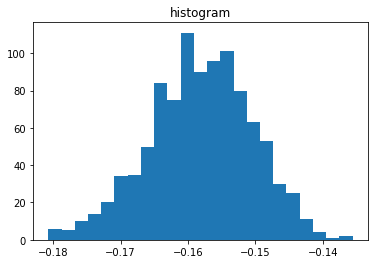

In [37]:
%matplotlib inline
from matplotlib import pyplot as plt  
plt.hist(Coefs, bins = 'auto') 
plt.title("histogram") 
plt.show()

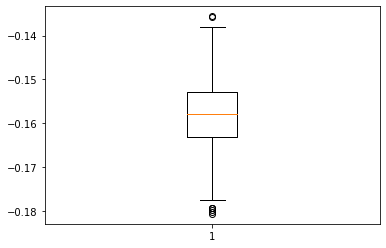

In [38]:
plt.boxplot(Coefs) 
# show plot  
plt.show() 

In [39]:
np.percentile(Coefs, [10, 90])  # the intervel

array([-0.16815546, -0.14840042])

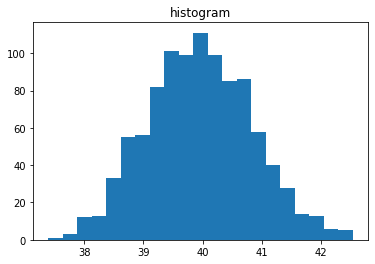

In [40]:
plt.hist(Intercepts, bins = 'auto') 
plt.title("histogram") 
plt.show()

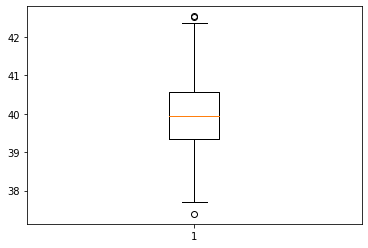

In [41]:
plt.boxplot(Intercepts) 
# show plot  
plt.show() 

In [42]:
np.percentile(Intercepts, [5, 95])   # 95 intervel

array([38.53575102, 41.43631311])